## Import Necessary Libraries

In [ ]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 22.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

## Dataset Overview

### Visualizing Sample Images with Corresponding Annotations

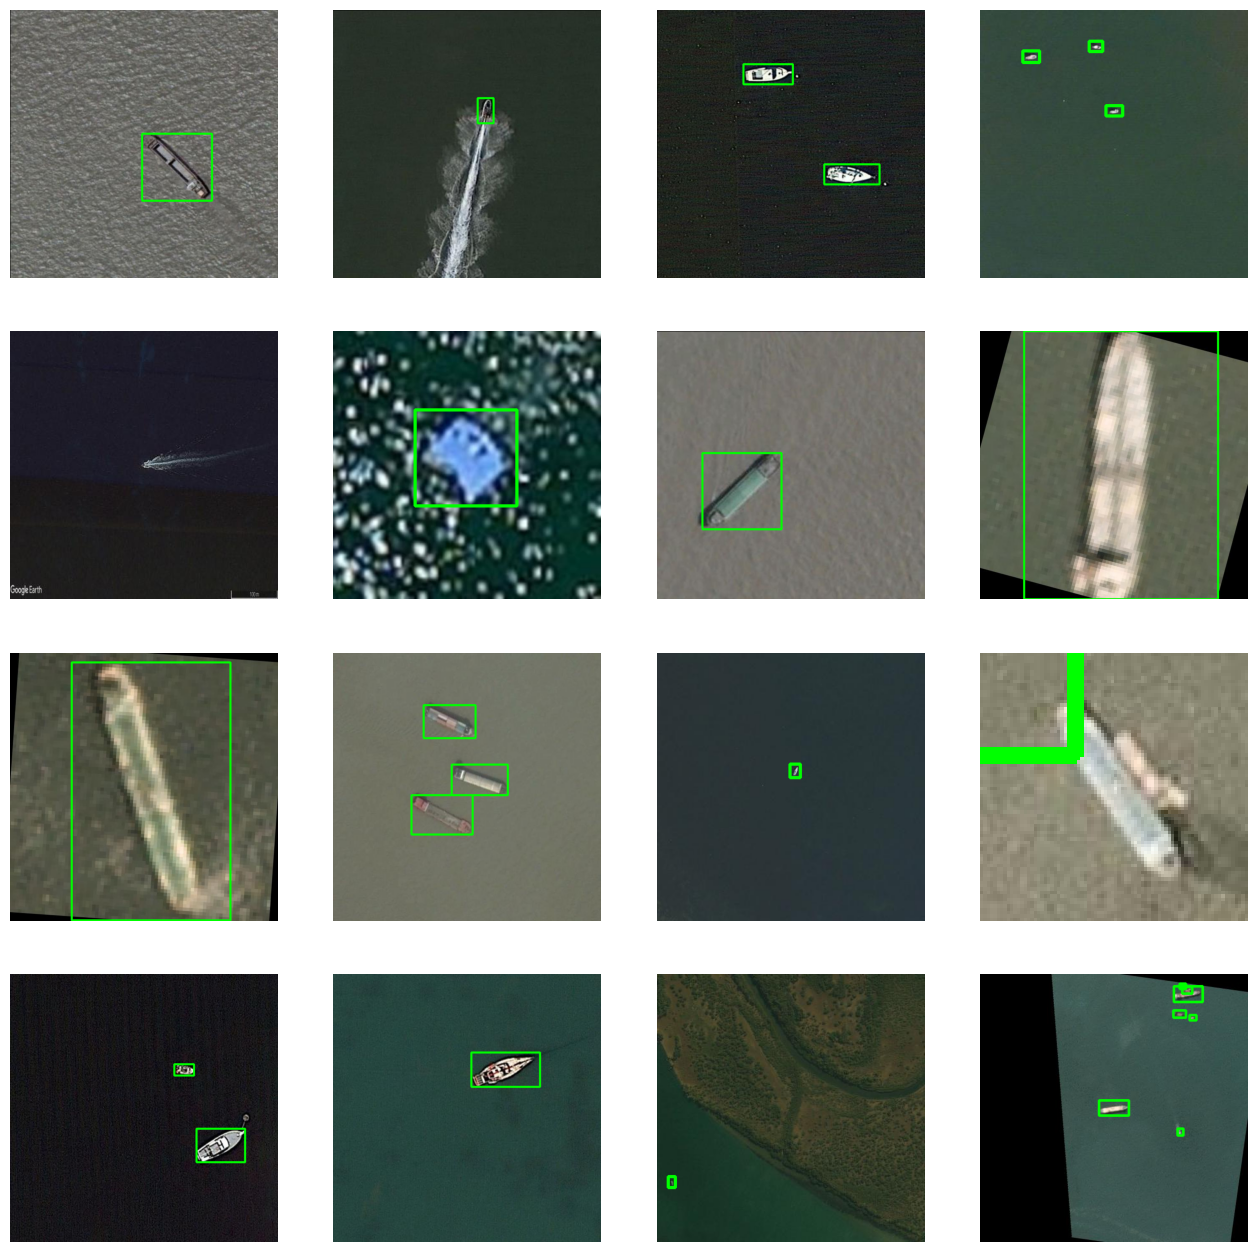

In [ ]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images"
train_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels"

test_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images"
test_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/images"
val_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

## Image Metadata

In [ ]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/02e39612d_jpg.rf.cc5483bb711f080d12b644ff62cf977a.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 768x768 and 3 channels.


## Model Training

In [ ]:
# # Loading a pretrained model
# model = YOLO('yolov8n.pt')

# # Training the model
# model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
#             epochs = 100,
#             imgsz = height,
#             seed = 42,
#             batch = 16)

In [ ]:
# # Loading a pretrained model
# model = YOLO('/kaggle/input/71epochs-pretrained-coco-ships/best (7).pt')

# # Training the model
# model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
#             epochs = 29,
#             imgsz = height,
#             seed = 42,
#             batch = 16)

In [ ]:
# Loading a pretrained model
model = YOLO('/kaggle/input/96epochs-pretrained-coco-ships/best (8).pt') # this is a pretrained yolo8 on coco, then fine-tuned on ships for 96 epochs

# Training the model
model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
            epochs = 4,
            imgsz = height,
            seed = 42,
            batch = 16)

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/96epochs-pretrained-coco-ships/best (8).pt, data=/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

100%|██████████| 755k/755k [00:00<00:00, 4.01MB/s]
2024-06-28 11:21:47,276	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-28 11:21:48,179	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 21.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:48<00:00, 199.92it/s]

train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]


train: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:10<00:00, 203.72it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 768 train, 768 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4      4.26G      1.204     0.9051       1.23         74        768: 100%|██████████| 606/606 [02:21<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:17<00:00,  3.98it/s]

                   all       2165       3720       0.54       0.51      0.486       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/4      6.64G       1.23     0.9307      1.238         62        768: 100%|██████████| 606/606 [02:16<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.25it/s]


                   all       2165       3720       0.59      0.491      0.492      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/4      4.93G      1.244     0.9444      1.244         55        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.26it/s]


                   all       2165       3720      0.572      0.517      0.499       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/4      5.09G      1.211     0.8998      1.221         34        768: 100%|██████████| 606/606 [02:14<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.27it/s]


                   all       2165       3720       0.57      0.523      0.498      0.294

4 epochs completed in 0.173 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:17<00:00,  3.78it/s]


                   all       2165       3720      0.571      0.523      0.498      0.294
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃██▁
lr/pg1,▃██▁
lr/pg2,▃██▁
metrics/mAP50(B),▁▄██
metrics/mAP50-95(B),▁▃▆█
metrics/precision(B),▁█▅▅
metrics/recall(B),▅▁▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▁▆█▂


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78eb0c2e0160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Model Performance

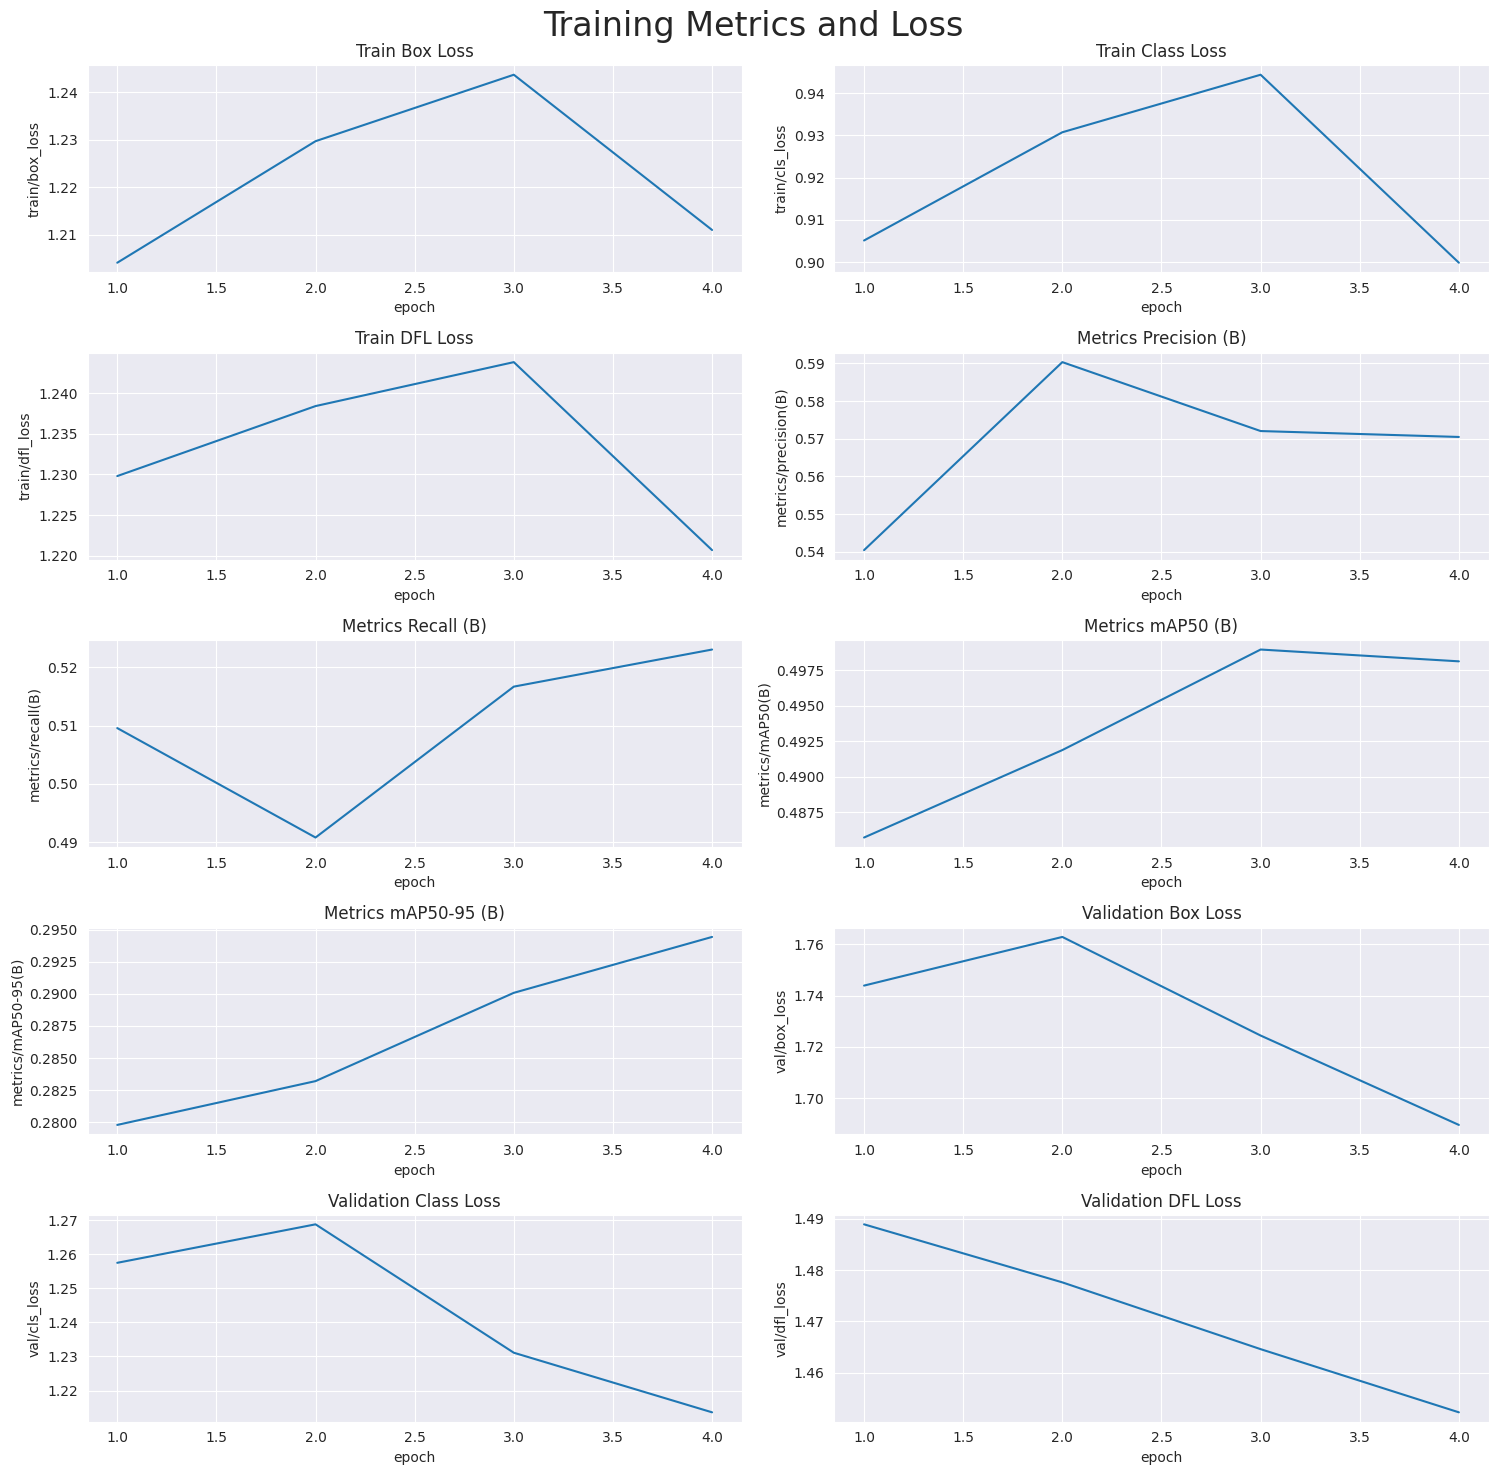

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


## Evaluation

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels... 1573 images, 51 backgrounds, 0 corrupt: 100%|██████████| 1573/1573 [00:07<00:00, 197.89it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.50it/s]


                   all       1573       2872      0.726      0.407      0.573      0.364
Speed: 0.3ms preprocess, 7.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


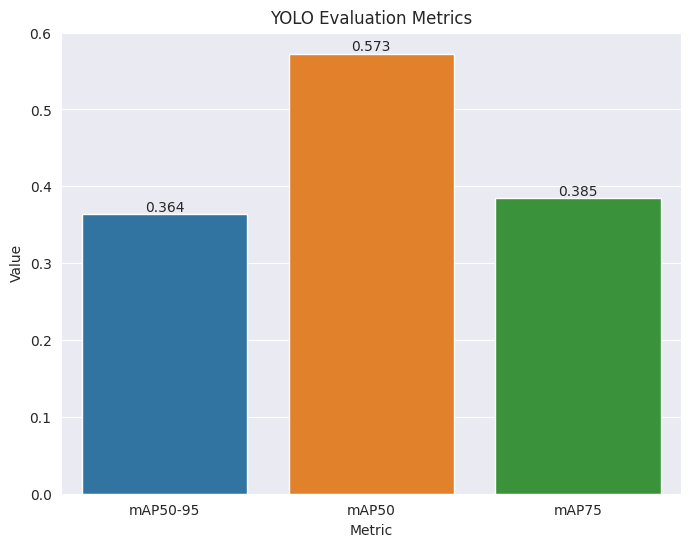

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

## Confusion matrix

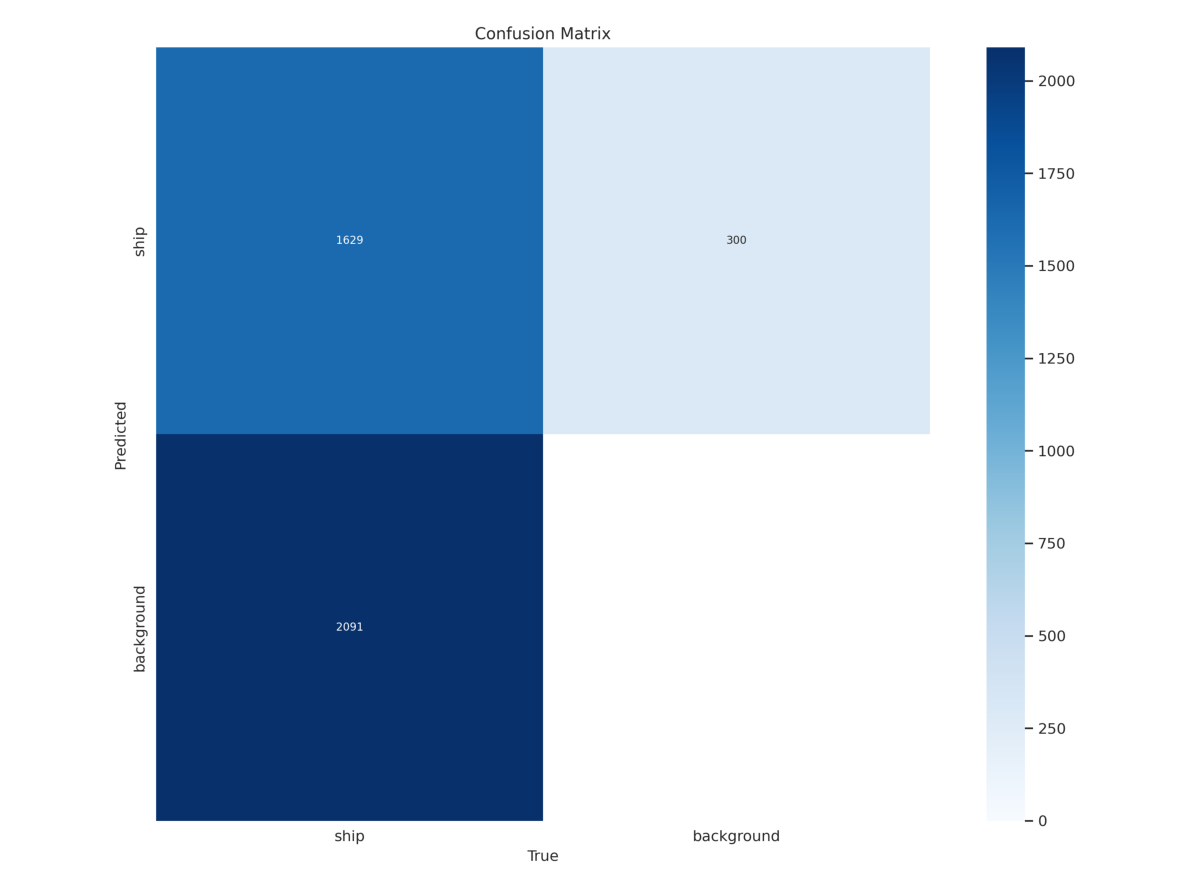

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

## Making Predictions on Test Images

In [ ]:
# Function to perform ship detections
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 768x768 1 ship, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.6ms
Speed: 3.9ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 2 ships, 8.7ms
Speed: 3.7ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 3.1ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 4.2ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 2.7ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 6 ships, 8.

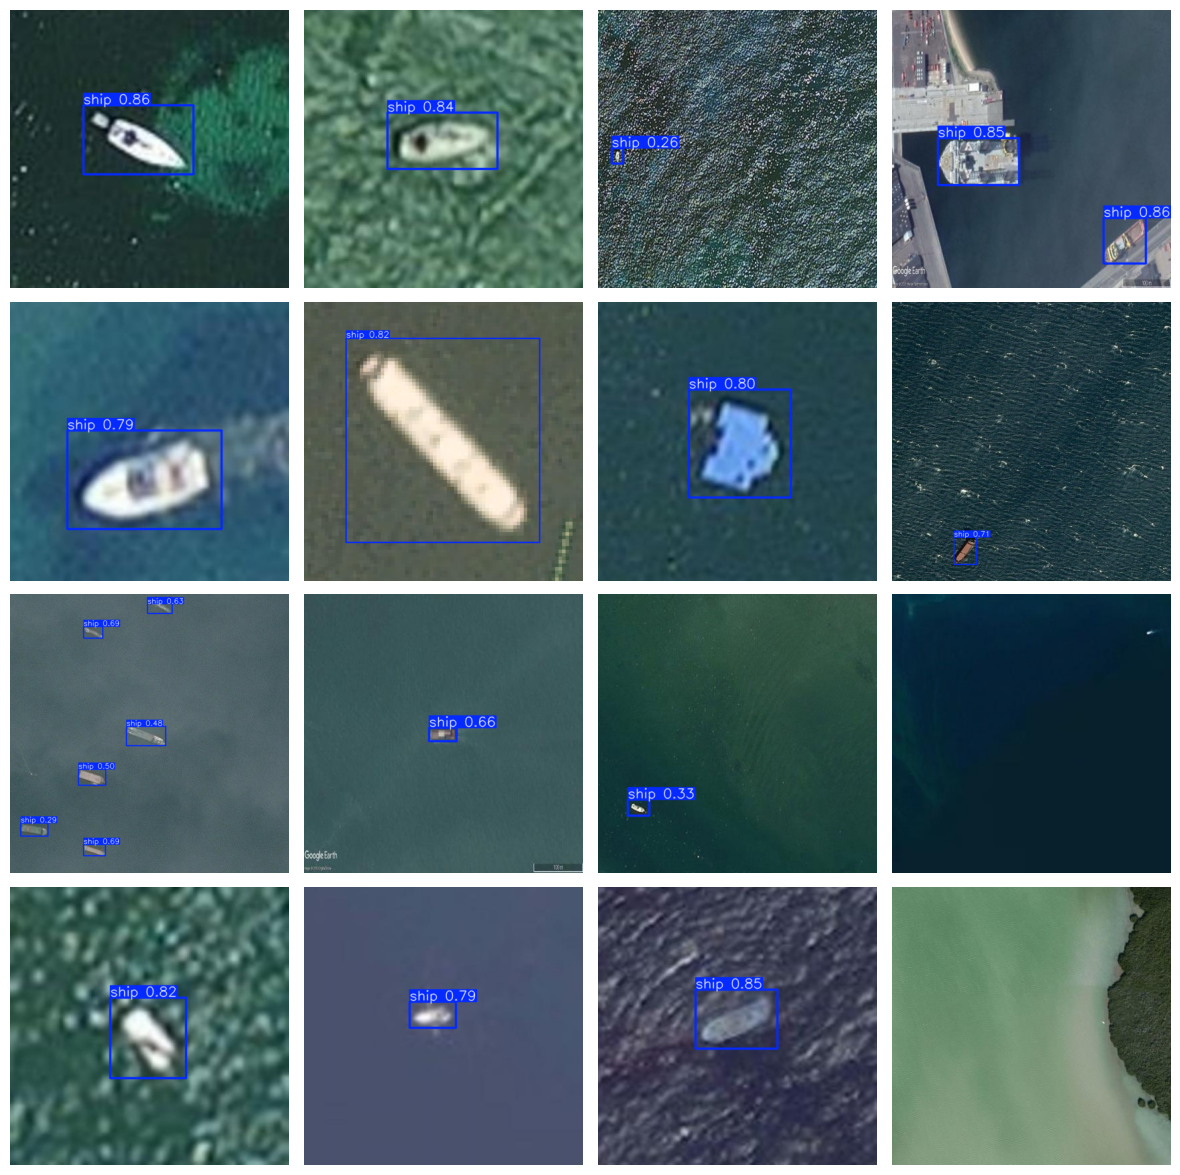

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
